In [1]:
import pandas as pd

index = pd.read_csv('index (England).csv')
index = index.dropna()
index.shape

(430017, 14)

In [2]:
z = pd.read_csv('z_scores.csv')
data = pd.merge(z, index, on='eid')

In [3]:
data.to_csv('z_scores(England).csv',index=False)

In [4]:
data.head()

eid  anterior corona radiata (left)  anterior corona radiata (right)  \
0  1000314                        0.811903                         1.287647   
1  1000388                       -0.571057                        -0.456034   
2  1000571                       -1.095148                        -0.971031   
3  1001060                        1.922104                         1.323251   
4  1001238                       -0.800706                        -1.360128   

   anterior limb of internal capsule (left)  \
0                                  0.785331   
1                                 -0.622337   
2                                 -1.707692   
3                                  0.152737   
4                                 -0.990315   

   anterior limb of internal capsule (right)  body of corpus callosum  \
0                                   0.816113                 0.769631   
1                                  -0.548966                -0.704128   
2                                  -1.401137                -0.404326   
3                                  -0.427638                 1.147957   
4                                  -0.868130                -0.517029   

   cerebral peduncle (left)  cerebral peduncle (right)  \
0                  1.306642                   2.015253   
1                  0.224381                   0.382133   
2                 -0.372279                  -0.522517   
3                  0.205889                   0.526655   
4                 -0.775753                  -0.603963   

   cingulum cingulate gyrus (left)  cingulum cingulate gyrus (right)  ...  \
0                         0.126916                          0.312918  ...   
1                         0.825040                          0.132577  ...   
2                        -0.951638                         -0.496043  ...   
3                        -0.145259                          1.231099  ...   
4                         0.013948                          0.710524  ...   

   Index of Multiple Deprivation (England)  Income score (England)  \
0                                    14.86                    0.08   
1                                    45.29                    0.30   
2                                    10.08                    0.05   
3                                     2.31                    0.02   
4                                     9.96                    0.05   

   Employment score (England)  Health score (England)  \
0                        0.07                    0.46   
1                        0.21                    1.52   
2                        0.08                    0.45   
3                        0.03                   -1.05   
4                        0.06                   -0.62   

   Education score (England)  Housing score (England)  Crime score (England)  \
0                      13.66                    28.65                  -0.32   
1                      41.44                    10.09                   0.70   
2                      11.76                     6.55                  -1.43   
3                       2.45                    18.00                  -1.15   
4                       9.50                    19.84                   0.12   

   Living environment score (England)         D  D_count  
0                                7.65  0.141028        1  
1                               35.75  0.343253        2  
2                                2.06  0.327212        2  
3                                2.40  0.491463        4  
4                               24.27  0.084104        1  

[5 rows x 62 columns]

In [5]:
import pandas as pd

data = pd.read_csv('z_scores(England).csv')

data_1 = data.dropna(axis=0)

print(data_1.shape)

(10363, 62)


In [9]:
data = pd.read_csv('z_scores(England).csv')
ESEM_d = pd.read_csv('C:/Users/1/Desktop/new_d/ESEM d factor score.csv')
data = pd.merge(data, ESEM_d, on='eid')

In [10]:
data.to_csv('z_scores(England)ESEM.csv',index=False)

#### Plot

In [1]:
import pandas as pd

index = pd.read_csv('index (England).csv')
d = index[['eid','D', 'D_count']]
ex = pd.read_csv('ex_data.csv')
count = ex[['eid','Count_Greater_Than','Count_Less_Than']]
data = pd.merge(d, count, on='eid')
ESEM_d = pd.read_csv('C:/Users/1/Desktop/new_d/ESEM d factor score.csv')
data = pd.merge(data, ESEM_d, on='eid')

In [6]:
import random
import statsmodels.formula.api as smf

random_effects = [random.choice(['GroupA', 'GroupB', 'GroupC']) for _ in range(len(data))]

data['RandomEffect'] = random_effects

model = smf.mixedlm(formula = "ESEM_D ~ Count_Less_Than", 
                    data = data, 
                    groups = data['RandomEffect'])

result = model.fit()

print(result.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: ESEM_D    
No. Observations:   11042   Method:             REML      
No. Groups:         3       Scale:              0.1627    
Min. group size:    3621    Log-Likelihood:     -5650.2827
Max. group size:    3711    Converged:          Yes       
Mean group size:    3680.7                                
----------------------------------------------------------
                Coef. Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       0.599    0.004 150.964 0.000  0.591  0.607
Count_Less_Than 0.008    0.002   4.293 0.000  0.004  0.012
Group Var       0.000    0.000                            



c:\Users\1\.conda\envs\pytorch\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


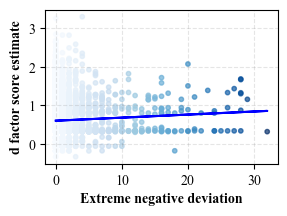

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['Count_Less_Than'], data['ESEM_D'], c=data['Count_Less_Than'], cmap='Blues', alpha=0.7, s=10)
plt.plot(data['Count_Less_Than'], predicted, c='b')

plt.xlabel('Extreme negative deviation', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')
#plt.ylim(-0.1, 8)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

#plt.colorbar(sc, label='Count_Less_Than')
plt.savefig(f"Extreme_negative_FA_scatter_ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

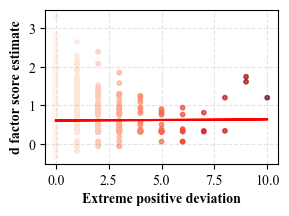

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['Count_Greater_Than'], data['ESEM_D'], c=data['Count_Greater_Than'], cmap='Reds', alpha=0.7, s=10)
plt.plot(data['Count_Greater_Than'], predicted, c='r')

plt.xlabel('Extreme positive deviation', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')

#plt.ylim(-0.1, 0.75)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig(f"Extreme_positve_FA_scatter_ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy.stats import sem
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

#coef = result.params['mean_GMV_z_value']
#p_value = result.pvalues['mean_GMV_z_value']

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))

def calc_sem(x):
    if len(x) > 1:
        return sem(x)
    else:
        return np.nan

grouped_data = data.groupby('D').agg(mean_prediction=('Count_Less_Than', 'mean'),
                                           sem_prediction=('Count_Less_Than', calc_sem)).reset_index()

plt.errorbar(grouped_data['D'], grouped_data['mean_prediction'], 
             yerr=grouped_data['sem_prediction'], fmt='o', color='b', 
             ecolor='b', elinewidth=1.5, capsize=2, label='Mean ± SEM',markersize=3)
plt.plot(data['D'], predicted, c='b')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('Number of multimorbidity')
plt.ylabel('Extreme negative deviation')
#plt.ylim(-0.1, 0.5)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.savefig(f"Extreme_negative_FA_scatter.svg", dpi=400, bbox_inches='tight', transparent=True)
plt.show()

In [10]:
import random
import statsmodels.formula.api as smf

#data = pd.read_csv('z_scores(England).csv')
#mean_values = data.iloc[:, 1:-13].mean(axis=1)

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_FA_z_value'] = mean_values

random_effects = [random.choice(['GroupA', 'GroupB', 'GroupC']) for _ in range(len(data))]

data['RandomEffect'] = random_effects

model = smf.mixedlm(formula = "ESEM_D ~ mean_FA_z_value", 
                    data = data, 
                    groups = data['RandomEffect'])

result = model.fit()

print(result.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: ESEM_D    
No. Observations:   10383   Method:             REML      
No. Groups:         3       Scale:              0.1638    
Min. group size:    3431    Log-Likelihood:     -5353.1964
Max. group size:    3513    Converged:          Yes       
Mean group size:    3461.0                                
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.605    0.046 13.078 0.000  0.514  0.695
mean_FA_z_value -0.033    0.006 -5.083 0.000 -0.045 -0.020
Group Var        0.006                                    



c:\Users\1\.conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\1\.conda\envs\pytorch\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\1\.conda\envs\pytorch\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\1\.conda\envs\pytorch\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


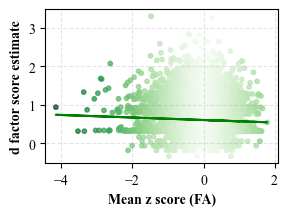

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['mean_FA_z_value'], data['ESEM_D'], c=abs(data['mean_FA_z_value']), cmap='Greens', alpha=0.7, s=10)
plt.plot(data['mean_FA_z_value'], predicted, c='g')

plt.xlabel('Mean z score (FA)', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig(f"Mean FA ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import cm

#coef = result.params['mean_GMV_z_value']
#p_value = result.pvalues['mean_GMV_z_value']

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(4, 3))

def calc_sem(x):
    if len(x) > 1:
        return sem(x)
    else:
        return np.nan

grouped_data = data.groupby('D_count').agg(mean_prediction=('mean_FA_z_value', 'mean'),
                                           sem_prediction=('mean_FA_z_value', calc_sem)).reset_index()

plt.errorbar(grouped_data['D_count'], grouped_data['mean_prediction'], 
             yerr=grouped_data['sem_prediction'], fmt='o', color='g', 
             ecolor='g', elinewidth=1.5, capsize=2, label='Mean ± SEM',markersize=3)
plt.plot(data['D_count'], predicted, c='g')

plt.xlabel('Number of multimorbidity')
plt.ylabel('Mean FA z score')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.savefig(f"Mean FA for count.svg", dpi=400, bbox_inches='tight', transparent=True)
plt.show()

In [7]:
from pyprocessmacro import Process
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#data = pd.read_csv('z_scores(England).csv')
#mean_values = data.iloc[:, 1:-13].mean(axis=1)

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_FA_z_value'] = mean_values

df = data.dropna(axis=0)
x1 = f'Living environment score (England)'
x2 = f'age'
y = f'mean_FA_z_value'

mean_fa_value_mean = df[y].mean()
x1_imd_mean = df[x1].mean()
x2_imd_mean = df[x2].mean()
d_mean = df['ESEM_D'].mean()

df[y] = df[y] - mean_fa_value_mean
df[x1] = df[x1] - x1_imd_mean
df[x2] = df[x2] - x2_imd_mean
df['ESEM_D'] = df['ESEM_D'] - d_mean

p = Process(data=df, model=4, x=x1, m=['ESEM_D'], y=y, controls=["age", "sex"], controls_in="all")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = Living environment score (England)
    m1 = ESEM_D
    y = mean_FA_z_value
Statistical Controls:
 age, sex



Sample size:
10363

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = mean_FA_z_value 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0030   0.0025 0.3673 7.6626    4  10358   0.0000

Coefficients

                                     coeff     se       t      p    LLCI    ULCI
Cons                               -0.0119 0.0087 -1.3722 0.1700 -0.0290  0.0051
Living environment score (England)  0.0005 0.0004  1.2029 0.2290 -0.0003  0.0014
age     

In [13]:
"""brain as mediator"""
from pyprocessmacro import Process
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#data = pd.read_csv('z_scores(England).csv')
#mean_values = data.iloc[:, 1:-13].mean(axis=1)

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_FA_z_value'] = mean_values

df = data.dropna(axis=0)
x1 = f'Living environment score (England)'
x2 = f'age'
y = f'ESEM_D'

d_mean = df[y].mean()
x1_imd_mean = df[x1].mean()
x2_imd_mean = df[x2].mean()
mean_fa_value_mean = df['mean_FA_z_value'].mean()

df[y] = df[y] - d_mean
df[x1] = df[x1] - x1_imd_mean
df[x2] = df[x2] - x2_imd_mean
df['mean_FA_z_value'] = df['mean_FA_z_value'] - mean_fa_value_mean

p = Process(data=df, model=4, x=x1, m=['mean_FA_z_value'], y=y, controls=["age", "sex"], controls_in="all")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = Living environment score (England)
    m1 = mean_FA_z_value
    y = ESEM_D
Statistical Controls:
 age, sex



Sample size:
10363

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = ESEM_D 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1    df2  p-value
 0.0092   0.0088 0.1628 24.1698    4  10358   0.0000

Coefficients

                                     coeff     se       t      p    LLCI    ULCI
Cons                                0.0340 0.0058  5.8868 0.0000  0.0227  0.0454
Living environment score (England)  0.0007 0.0003  2.2794 0.0227  0.0001  0.0012
age            